In [34]:
import pandas as pd 
import json
import requests 
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from scipy.stats import linregress

In [22]:
#Create Initial DataFrame
d = pd.DataFrame({"id":[""]})

#How many number of pokemon do you want 
y = 151

#loop through PokeAPI first 151 pokemons
for x in range(1,y+1):
    
    #Get API url
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{x}/").json()
    
    #Pokemon ID
    i = r["id"]
    d.loc[x,"id"] = i
    
    #Pokemon Name
    n = r["name"]
    d.loc[x,"name"] = n
    
    #Pokemon Type
    t1 = r["types"][0]["type"]["name"]
    d.loc[x,"type 1"] = t1
    try:
        t2 = r["types"][1]["type"]["name"]
        d.loc[x,"type 2"] = t2
    except IndexError: 
        d.loc[x,"type 2"] = "na"
    
    #Pokemon Height
    h = r["height"]
    d.loc[x,"height"] = h
    
    #Pokemon Base Stat/HP
    b = r["stats"][0]["base_stat"]
    d.loc[x,"HP"] = b
    
    #Pokemon HP
    w = r["weight"]
    d.loc[x,"weight"] = w
    
d.drop(0, axis=0,inplace=True)
d.head(20)
#d = original DataFrame of 151 pokemon

,id,name,type 1,type 2,height,HP,weight
1,1,bulbasaur,grass,poison,7.0,45.0,69.0
2,2,ivysaur,grass,poison,10.0,60.0,130.0
3,3,venusaur,grass,poison,20.0,80.0,1000.0
4,4,charmander,fire,na,6.0,39.0,85.0
5,5,charmeleon,fire,na,11.0,58.0,190.0
6,6,charizard,fire,flying,17.0,78.0,905.0
7,7,squirtle,water,na,5.0,44.0,90.0
8,8,wartortle,water,na,10.0,59.0,225.0
9,9,blastoise,water,na,16.0,79.0,855.0
10,10,caterpie,bug,na,3.0,45.0,29.0


In [23]:
# import csv from resources folder
csv_path = "Resources/Pokemon.csv"

# create DataFrame from csv
df = pd.read_csv(csv_path)

#strart index at 1
df.index = np.arange(1, len(df) + 1)

#exclude any entry with "mega" in name
df = df[~df["Name"].str.contains("Mega")]

#reset index
df.index = np.arange(1, len(df) + 1)

# change dataframe to only the first 151 pokemon
df = df.iloc[0:151,:]

#reanme the "Name" column to "name"
df = df.rename(columns={"Name": "name"})

df.tail(20)

,#,name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
132,132,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False
133,133,Eevee,Normal,NaN,325,55,55,50,45,65,55,1,False
134,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
135,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False
136,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
137,137,Porygon,Normal,NaN,395,65,60,70,85,75,40,1,False
138,138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
139,139,Omastar,Rock,Water,495,70,60,125,115,70,55,1,False
140,140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,False
141,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1,False


In [41]:
# Join the two dataframes on the pokemon name
df1 = pd.merge(d, df, on="name")

# Check the data types of the "name" column
print(d["name"].dtype)
print(df["name"].dtype)

# Standardize the case of the values
d["name"] = d["name"].str.lower()
df["name"] = df["name"].str.lower()

# Remove leading/trailing whitespaces
d["name"] = d["name"].str.strip()
df["name"] = df["name"].str.strip()

# Join the two dataframes on the pokemon name
df1 = pd.merge(d, df, on="name")

#drop the HP_Y column
df1 = df1.drop(columns=["HP_y"])

#drop the Type 1 and Type 2 Columns
df1 = df1.drop(columns=["Type 1", "Type 2"])

#rename the HP_X column to HP
df1.columns = df1.columns.str.replace("HP_x", "HP")

# save as csv file to Rsources folder
df1.to_csv("Resources/Pokemon1.csv", index=False)

df1.head(151)

object
object


,id,name,type 1,type 2,height,HP,weight,#,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,bulbasaur,grass,poison,7.0,45.0,69.0,1,318,49,49,65,65,45,1,False
1,2,ivysaur,grass,poison,10.0,60.0,130.0,2,405,62,63,80,80,60,1,False
2,3,venusaur,grass,poison,20.0,80.0,1000.0,3,525,82,83,100,100,80,1,False
3,4,charmander,fire,na,6.0,39.0,85.0,4,309,52,43,60,50,65,1,False
4,5,charmeleon,fire,na,11.0,58.0,190.0,5,405,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,147,dratini,dragon,na,18.0,41.0,33.0,147,300,64,45,50,50,50,1,False
143,148,dragonair,dragon,na,40.0,61.0,165.0,148,420,84,65,70,70,70,1,False
144,149,dragonite,dragon,flying,22.0,91.0,2100.0,149,600,134,95,100,100,80,1,False
145,150,mewtwo,psychic,na,20.0,106.0,1220.0,150,680,110,90,154,90,130,1,True


In [25]:
#Group by type and calculate average HP per group into a new DataFrame
d1 = pd.DataFrame(df1.groupby(["type 1"])["HP"].mean())
d2 = d1.reset_index()
d2["HP"] = round(d2["HP"],1)
d2
#d2 = HP per type DataFrame

,type 1,HP
0,bug,55.4
1,dragon,64.3
2,electric,54.4
3,fairy,82.5
4,fighting,63.6
5,fire,63.8
6,ghost,45.0
7,grass,65.0
8,ground,58.1
9,ice,77.5


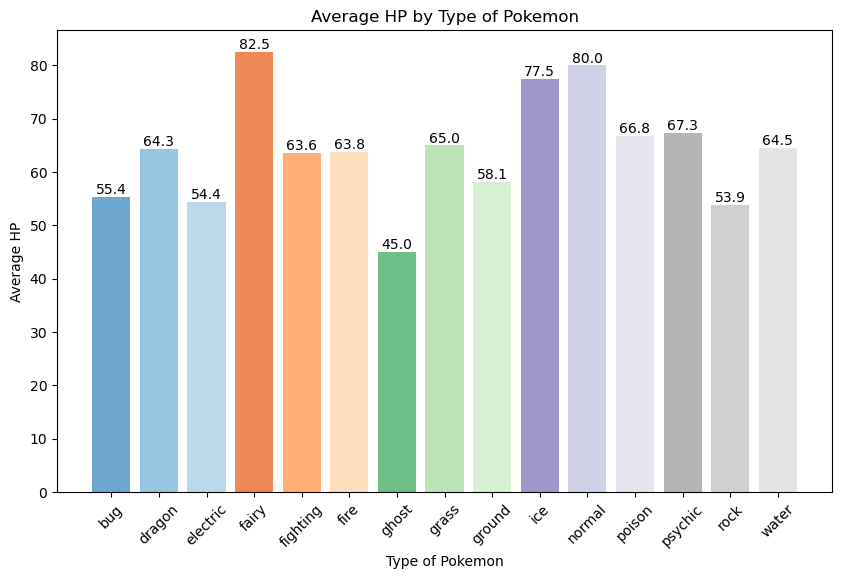

In [31]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Define a color map with a unique color for each bar
colors = plt.cm.tab20c(np.linspace(0, 1, len(d2)))

# Plot average HP for each type of Pokemon with a unique color for each bar
plt.bar(x_axis, y_axis, color=colors, alpha=0.7)

# Add data labels to the bars
for x, y in zip(x_axis, y_axis):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("Average HP")
plt.title("Average HP by Type of Pokemon")

# Show the modified plot
plt.show()

In [27]:
#Count number of pokemon from each type in orginal 151
f = pd.DataFrame(d["type 1"].value_counts())

#f = frequency count of each type
f2 = f.reset_index()
f2.columns = ["type 1", "count"]
f2

#f2 = type count DataFrame

,type 1,count
0,water,28
1,normal,22
2,poison,14
3,grass,12
4,fire,12
5,bug,12
6,electric,9
7,rock,9
8,ground,8
9,psychic,8


In [28]:
#Merge hp per type and type count DataFrames
new = pd.merge(d2, f2, on = ["type 1"])
new["Frequency %"] = round(100*(new["count"]/d["type 1"].count()), 1)
new1 = new.sort_values("Frequency %", ascending = False)
new1
#new1 = type breakdown DataFrame

,type 1,HP,count,Frequency %
14,water,64.5,28,18.5
10,normal,80.0,22,14.6
11,poison,66.8,14,9.3
0,bug,55.4,12,7.9
5,fire,63.8,12,7.9
7,grass,65.0,12,7.9
2,electric,54.4,9,6.0
13,rock,53.9,9,6.0
8,ground,58.1,8,5.3
12,psychic,67.3,8,5.3


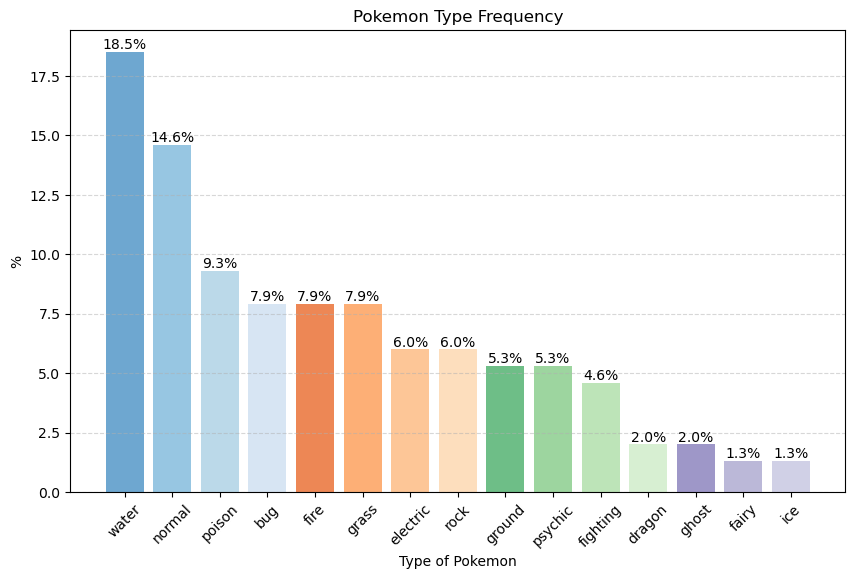

In [29]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

# Plot type count frequencies with gridlines and a color palette
colors = plt.cm.tab20c(np.arange(len(new1)))
plt.bar(new1["type 1"], new1["Frequency %"], color=colors, alpha=0.7)

# Add data labels to the bars
for i, (x, y) in enumerate(zip(new1["type 1"], new1["Frequency %"])):
    plt.text(x, y, f"{y}%", ha='center', va='bottom')

# Customize plot labels and title
plt.xticks(rotation=45)
plt.xlabel("Type of Pokemon")
plt.ylabel("%")
plt.title("Pokemon Type Frequency")

# Enable gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the modified plot
plt.show()

In [49]:
# create a function for linear regression
def linreg(x_values, y_values, title, x_label, y_label, text_coordinates):

    # run regression on pokemon data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    if len(x_values) == len(y_values):
        plt.scatter(x_values, y_values, alpha=0.7)
    else:
        colors = plt.cm.tab20c(np.linspace(0, 1, len(x_values)))
        plt.scatter(x_values, y_values, color=colors, alpha=0.7)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the text for the line equation and r-value
    eq_and_rvalue = line_eq + "\n" + "r = " + str(round(rvalue, 2))
    plt.annotate(eq_and_rvalue, text_coordinates, fontsize=15, color="red")

    # Customize plot labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show the modified plot
    plt.show()

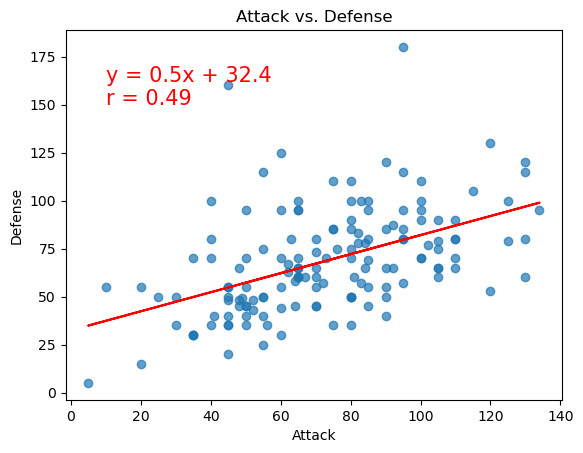

In [50]:
# Linear regression for Attack and Defense using linreg() function
x_values = df1["Attack"]
y_values = df1["Defense"]

# Call linreg() function
linreg(x_values, y_values, "Attack vs. Defense", "Attack", "Defense", (10, 150))



